In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import h5py

In [ ]:
import os
os.chdir('..')

In [2]:
bpds = []
for i in range(78):
    tmp = np.load(f'outs/mnist_subvpsde_ddpmpp_continuous_42/bpds/test_0/mnist_ckpt_last_bpd_{i}.npz')
    bpds.append(tmp['arr_0'])
bpds = np.concatenate(bpds)
mnist_score = bpds
print(mnist_score.shape)
np.save('outs/cifar10_subvp_likelihood_tw/eval_cifar10_server/test_ckpt_26_bpd_full', mnist_score)

FileNotFoundError: [Errno 2] No such file or directory: 'outs/mnist_subvpsde_ddpmpp_continuous_42/bpds/test_0/mnist_ckpt_last_bpd_0.npz'

In [51]:
# bpds = []
# for i in range(165):
#     tmp = np.load(f'outs/cifar10_subvp_likelihood_tw/eval_svhn_server/test_ckpt_26_bpd_{i}.npz')
#     bpds.append(tmp['arr_0'])
# bpds = np.concatenate(bpds)
# svhn_nll = bpds
# print(svhn_nll.shape)
# np.save('outs/cifar10_subvp_likelihood_tw/eval_svhn_server/test_ckpt_26_bpd_full', svhn_nll)

In [7]:
# bpds = []
# folder='outs/cifar10_subvp_likelihood_tw/eval_svhn_server_shuffle_8x8'
# for i in range(125):
#     tmp = np.load(f'{folder}/test_ckpt_26_bpd_{i}.npz')
#     bpds.append(tmp['arr_0'])
# bpds = np.concatenate(bpds)
# svhn_nll_sf8 = bpds
# print(svhn_nll_sf8.shape)
# np.save(f'{folder}/test_ckpt_26_bpd_full', svhn_nll_sf8)

(128000,)


In [2]:
cifar_nll = np.load('outs/cifar10_subvp_likelihood_tw/eval_cifar10_server/test_ckpt_26_bpd_full.npy')
svhn_nll = np.load('outs/cifar10_subvp_likelihood_tw/eval_svhn_server/test_ckpt_26_bpd_full.npy')
svhn_nll_sf8 = np.load('outs/cifar10_subvp_likelihood_tw/eval_svhn_server_shuffle_8x8/test_ckpt_26_bpd_full.npy')

In [3]:
print(cifar_nll.shape)
print(svhn_nll.shape)
print(svhn_nll_sf8.shape)



(46080,)
(126720,)
(128000,)


In [4]:
# bpd_file_paths = glob('outs/cifar10_subvp_likelihood_tw/eval_cifar10_server/test_ckpt_26_bpd_*.npz') 
# bpd_file_paths = sorted(bpd_file_paths)
# bpds = []
# for p in bpd_file_paths:
#     tmp = np.load(p)
#     bpds.append(tmp['arr_0'])
# bpds = np.concatenate(bpds)
# cifar_nll = bpds

In [5]:
# bpd_file_paths = glob('outs/cifar10_subvp_likelihood_tw/eval_svhn_server/test_ckpt_26_bpd_*.npz') 
# bpd_file_paths = sorted(bpd_file_paths)
# bpds = []
# for p in bpd_file_paths:
#     tmp = np.load(p)
#     bpds.append(tmp['arr_0'])
# bpds = np.concatenate(bpds)
# svhn_nll = bpds

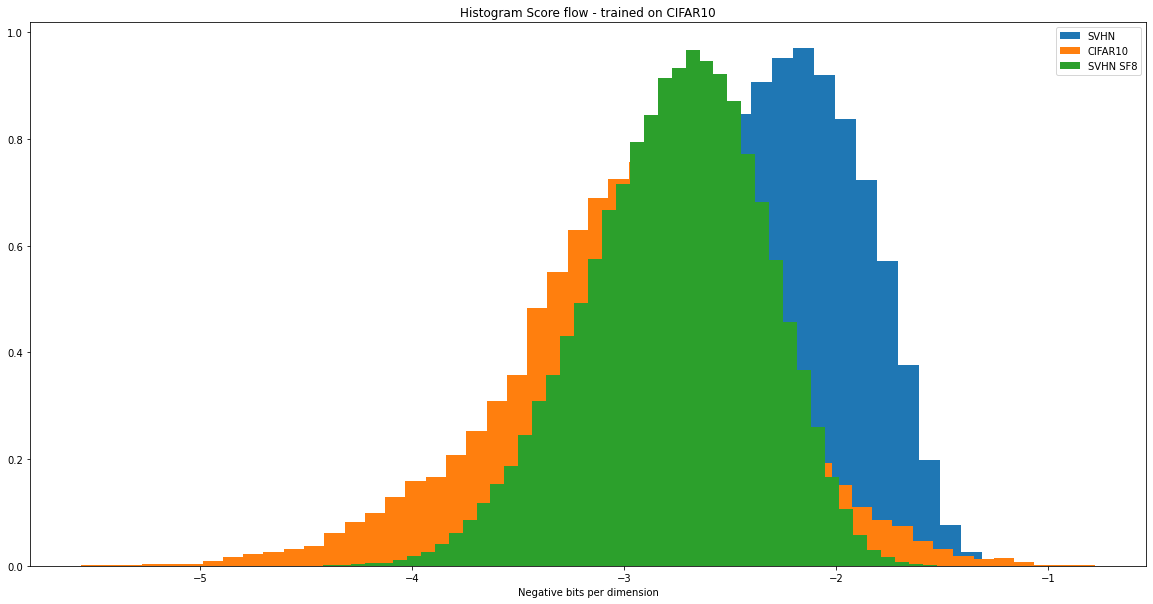

In [4]:
plt.figure(figsize=(20,10))
plt.title("Histogram Score flow - trained on CIFAR10")
plt.xlabel("Negative bits per dimension")
plt.hist(-svhn_nll, label="SVHN", density=True, bins=30)
plt.hist(-cifar_nll, label="CIFAR10", density=True, bins=50)
plt.hist(-svhn_nll_sf8, label="SVHN SF8", density=True, bins=50)
plt.legend()
plt.show()
# plt.savefig("images/histogram_glow_cifar_svhn.png", dpi=300)